# Sentiment Analysis on Tweet Datasets 

In [1]:
# Load libraries
import pandas as pd
import os
import numpy as np
from pandas.compat import StringIO, BytesIO
from collections import defaultdict

# This is to ensure that the text doesn't get truncated when printed
pd.set_option('display.max_colwidth', -1)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Change these paths to where you downloaded the data
in_dir = "C:/Users/Remi_Adefioye/Desktop"
out_dir = "C:/Users/Remi_Adefioye/Desktop/out"

##Load text dataset

yelp = pd.read_csv('C:/Users/Remi_Adefioye/Desktop/EXCEL/EmojiSentimentTraining.csv', encoding = "ISO-8859-1")

yelp_labelled =  pd.DataFrame(yelp)# Turn the dataset into dataframe

#Get brief description of the data

list(yelp_labelled)
yelp_labelled.info()
yelp_labelled.shape
yelp_labelled.head()
yelp_labelled.tail()

['Polarity', 'Tweet ID', 'Date of Tweet', 'Query', 'Username', 'Tweet']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399773 entries, 0 to 399772
Data columns (total 6 columns):
Polarity         399773 non-null int64
Tweet ID         399773 non-null int64
Date of Tweet    399773 non-null object
Query            399773 non-null object
Username         399773 non-null object
Tweet            399773 non-null object
dtypes: int64(2), object(4)
memory usage: 18.3+ MB


(399773, 6)

,Polarity,Tweet ID,Date of Tweet,Query,Username,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
2,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
3,0,1467812579,Mon Apr 06 22:20:17 PDT 2009,NO_QUERY,pardonlauren,I just re-pierced my ears
4,0,1467812723,Mon Apr 06 22:20:19 PDT 2009,NO_QUERY,TLeC,@caregiving I couldn't bear to watch it. And I thought the UA loss was embarrassing . . . . .


,Polarity,Tweet ID,Date of Tweet,Query,Username,Tweet
399768,4,2193578847,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,RobFoxKerr,"You heard it here first -- We're having a girl. Hope it has my looks and Wendy's brains. (Kidding, babe)."
399769,4,2193579092,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,cathriiin,@La_r_a NEVEER I think that you both will get on well with each other...
399770,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
399771,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better than just waiting for it In the end I just wonder if I have time to keep up a good blog."
399772,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details


In [4]:
#Use this to Get Polarity count

yelp_labelled.Polarity.value_counts()

0    200101
4    199672
Name: Polarity, dtype: int64

In [5]:
# To display first 10 rows of the  dataset that have Zero polarity score

yelp_labelled[yelp_labelled.Polarity == 0].head(10)

,Polarity,Tweet ID,Date of Tweet,Query,Username,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
2,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
3,0,1467812579,Mon Apr 06 22:20:17 PDT 2009,NO_QUERY,pardonlauren,I just re-pierced my ears
4,0,1467812723,Mon Apr 06 22:20:19 PDT 2009,NO_QUERY,TLeC,@caregiving I couldn't bear to watch it. And I thought the UA loss was embarrassing . . . . .
5,0,1467812771,Mon Apr 06 22:20:19 PDT 2009,NO_QUERY,robrobbierobert,"@octolinz16 It it counts, idk why I did either. you never talk to me anymore"
6,0,1467812784,Mon Apr 06 22:20:20 PDT 2009,NO_QUERY,bayofwolves,"@smarrison i would've been the first, but i didn't have a gun. not really though, zac snyder's just a doucheclown."
7,0,1467812964,Mon Apr 06 22:20:22 PDT 2009,NO_QUERY,lovesongwriter,Hollis' death scene will hurt me severely to watch on film wry is directors cut not out now?
8,0,1467813137,Mon Apr 06 22:20:25 PDT 2009,NO_QUERY,armotley,about to file taxes
9,0,1467813579,Mon Apr 06 22:20:31 PDT 2009,NO_QUERY,starkissed,@LettyA ahh ive always wanted to see rent love the soundtrack!!


In [6]:
# To display 10 rows of the  dataset that have scores greater than Zero polarity score

yelp_labelled[yelp_labelled.Polarity > 0].head(10)


,Polarity,Tweet ID,Date of Tweet,Query,Username,Tweet
200101,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
200102,4,1467822391,Mon Apr 06 22:22:47 PDT 2009,NO_QUERY,ajarofalmonds,@ProductOfFear You can tell him that I just burst out laughing really loud because of that Thanks for making me come out of my sulk!
200103,4,1467822489,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally joining twitter"
200104,4,1467822530,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,claaare,crazy day of school. there for 10 hours straiiight. about to watch the hills. @spencerpratt told me too! ha. happy birthday JB!
200105,4,1467822729,Mon Apr 06 22:22:52 PDT 2009,NO_QUERY,tophatdog,"@soundwav2010 At least I won't be the only one feeling lost! This may cause me many later than usual nights, already addicting"
200106,4,1467822814,Mon Apr 06 22:22:54 PDT 2009,NO_QUERY,misstoriblack,Just added tweetie to my new iPhone
200107,4,1467823216,Mon Apr 06 22:23:00 PDT 2009,NO_QUERY,anyyankeest,@iJohn kitteh is sleepin on my crotch which proves she likes me more
200108,4,1467823405,Mon Apr 06 22:23:03 PDT 2009,NO_QUERY,gattermeier,reaching amritsar in an hour and (if i find a bus) should be at wagah border by 2pm - http://bkite.com/06fuJ
200109,4,1467823618,Mon Apr 06 22:23:06 PDT 2009,NO_QUERY,conniechiwa23,happy to spend time with the family.
200110,4,1467823643,Mon Apr 06 22:23:06 PDT 2009,NO_QUERY,Mackenzie2009,so effing tired of my throat hurting.... ooooohh... i just got a crazy craving for a pina colada/banana slushie!!!!


In [7]:
# Do Data Preparation

yelp_labelled['pre_clean_len'] = [len(t) for t in yelp_labelled.Tweet]

In [8]:
# Do the following to Create Data Dictionary

from pprint import pprint
data_dict = {
    'Polarity':{
        'type':yelp_labelled.Polarity.dtype,
        'description':'Polarity class - 0:negative, 1:positive'
    },
    'Tweet':{
        'type':yelp_labelled.Tweet.dtype,
        'description':'Review text'
    },
    'pre_clean_len':{
        'type':yelp_labelled.pre_clean_len.dtype,
        'description':'Length of the Polarity before cleaning'
    },
    'dataset_shape':yelp_labelled.shape
}

pprint(data_dict)



{'Polarity': {'description': 'Polarity class - 0:negative, 1:positive',
              'type': dtype('int64')},
 'Tweet': {'description': 'Review text', 'type': dtype('O')},
 'dataset_shape': (399773, 7),
 'pre_clean_len': {'description': 'Length of the Polarity before cleaning',
                   'type': dtype('int64')}}


In [11]:
#Import Matplot Library to get graphical display

import matplotlib
import matplotlib.pyplot as plt

# Show Box Plot

fig, ax = plt.subplots(figsize=(6, 6))
plt.boxplot(yelp_labelled.pre_clean_len)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b252a718d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b252a71f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2535a8d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1b252a91630>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b252a91978>],
 'means': []}

<Figure size 600x600 with 1 Axes>

In [12]:
# Display top 15 pre-clean tweet greater that 50 

yelp_labelled[yelp_labelled.pre_clean_len > 50].head(15)

,Polarity,Tweet ID,Date of Tweet,Query,Username,Tweet,pre_clean_len
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",115
4,0,1467812723,Mon Apr 06 22:20:19 PDT 2009,NO_QUERY,TLeC,@caregiving I couldn't bear to watch it. And I thought the UA loss was embarrassing . . . . .,94
5,0,1467812771,Mon Apr 06 22:20:19 PDT 2009,NO_QUERY,robrobbierobert,"@octolinz16 It it counts, idk why I did either. you never talk to me anymore",77
6,0,1467812784,Mon Apr 06 22:20:20 PDT 2009,NO_QUERY,bayofwolves,"@smarrison i would've been the first, but i didn't have a gun. not really though, zac snyder's just a doucheclown.",117
7,0,1467812964,Mon Apr 06 22:20:22 PDT 2009,NO_QUERY,lovesongwriter,Hollis' death scene will hurt me severely to watch on film wry is directors cut not out now?,93
9,0,1467813579,Mon Apr 06 22:20:31 PDT 2009,NO_QUERY,starkissed,@LettyA ahh ive always wanted to see rent love the soundtrack!!,64
10,0,1467814783,Mon Apr 06 22:20:50 PDT 2009,NO_QUERY,KatieAngell,Just going to cry myself to sleep after watching Marley and Me.,65
11,0,1467816149,Mon Apr 06 22:21:11 PDT 2009,NO_QUERY,Pbearfox,@julieebaby awe i love you too!!!! 1 am here i miss you,56
12,0,1467817502,Mon Apr 06 22:21:32 PDT 2009,NO_QUERY,Tmttq86,@fleurylis I don't either. Its depressing. I don't think I even want to know about the kids in suitcases.,106
13,0,1467818481,Mon Apr 06 22:21:46 PDT 2009,NO_QUERY,lionslamb,He's the reason for the teardrops on my guitar the only one who has enough of me to break my heart,99


In [13]:
#To select tweet on 28th row

yelp_labelled.Tweet[28]

'@Hollywoodheat I should have paid more attention when we covered photoshop in my webpage design class in undergrad '

In [14]:
#To select tweet on 50th row

yelp_labelled.Tweet[50]

'My mind and body are severely protesting this &quot;getting up&quot;  thing. Had nightmares to boot '

In [15]:
#Import libraries for data cleasing

from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
token = WordPunctTokenizer()

In [16]:
## Defining data cleaning function
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def review_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = token.tokenize(lower_case)
    return (" ".join(words)).strip()


In [18]:
#Import other libraries for data cleasing

from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
import unidecode
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

lemmer = WordNetLemmatizer()

# Define a functon that takes as input an entire document then preprocesses each word in the document and returns the preprocessed document 

def preprocess(x):
    # Lower case
    x = x.lower()
    
    # Remove stop words
    x = ' '.join([w for w in x.split() if w not in stop_words])
    
    
    
    return x



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Remi_Adefioye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Remi_Adefioye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
#Then apply preprocess to the tweet

yelp['text_Clean'] = yelp_labelled['Tweet'].apply(preprocess)

In [20]:
#Get the top 5 and last 5 after cleaning the data

yelp.head()
yelp.tail()

,Polarity,Tweet ID,Date of Tweet,Query,Username,Tweet,pre_clean_len,text_Clean
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",115,"@switchfoot http://twitpic.com/2y1zl - awww, that's bummer. shoulda got david carr third day it. ;d"
1,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,whole body feels itchy like fire
2,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,36,@tatiana_k nope
3,0,1467812579,Mon Apr 06 22:20:17 PDT 2009,NO_QUERY,pardonlauren,I just re-pierced my ears,26,re-pierced ears
4,0,1467812723,Mon Apr 06 22:20:19 PDT 2009,NO_QUERY,TLeC,@caregiving I couldn't bear to watch it. And I thought the UA loss was embarrassing . . . . .,94,@caregiving bear watch it. thought ua loss embarrassing . . . . .


,Polarity,Tweet ID,Date of Tweet,Query,Username,Tweet,pre_clean_len,text_Clean
399768,4,2193578847,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,RobFoxKerr,"You heard it here first -- We're having a girl. Hope it has my looks and Wendy's brains. (Kidding, babe).",106,"heard first -- we're girl. hope looks wendy's brains. (kidding, babe)."
399769,4,2193579092,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,cathriiin,@La_r_a NEVEER I think that you both will get on well with each other...,73,@la_r_a neveer think get well other...
399770,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd,33,recovering long weekend
399771,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better than just waiting for it In the end I just wonder if I have time to keep up a good blog.",132,"@cliff_forster yeah, work better waiting end wonder time keep good blog."
399772,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details,57,ready mojo makeover? ask details


In [21]:
# Put the clean data into dataframe and set the target variable

yelp_df = pd.DataFrame(yelp,columns=['text_Clean'])
yelp_df['target'] = yelp_labelled.Polarity
yelp_df.head()

,text_Clean,target
0,"@switchfoot http://twitpic.com/2y1zl - awww, that's bummer. shoulda got david carr third day it. ;d",0
1,whole body feels itchy like fire,0
2,@tatiana_k nope,0
3,re-pierced ears,0
4,@caregiving bear watch it. thought ua loss embarrassing . . . . .,0


In [22]:
#Import more libraries

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [23]:
#Drop rows with nul or NA values

yelp_df.dropna(inplace=True)
yelp_df.reset_index(drop=True,inplace=True)
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399773 entries, 0 to 399772
Data columns (total 2 columns):
text_Clean    399773 non-null object
target        399773 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [24]:
#Display top 5 rows

yelp_df.head()

,text_Clean,target
0,"@switchfoot http://twitpic.com/2y1zl - awww, that's bummer. shoulda got david carr third day it. ;d",0
1,whole body feels itchy like fire,0
2,@tatiana_k nope,0
3,re-pierced ears,0
4,@caregiving bear watch it. thought ua loss embarrassing . . . . .,0


In [25]:
## Split the data set into dependent and independent variables

x = yelp_df.text_Clean
y = yelp_df.target

In [26]:
#Split the dataset into Train, Test and Validation 

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
SEED = 1258
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [27]:
#Import Machine Learing libraries

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [28]:
#Define accuracy summary

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In [29]:
#Import library for Term Frequency Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [30]:
#Import Machne Learning libraries and compare different Algorithm performance

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

In [31]:
#Define Classification comparator

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print(c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

In [33]:
#Get training and test time with accuracy results

%time
trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

Wall time: 0 ns
Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 50.08%
accuracy score: 78.16%
model is 28.09% more accurate than null accuracy
train and test time: 44.64s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 50.08%
accuracy score: 76.36%
model is 26.29% more accurate than null accuracy
train and test time: 67.24s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 50.08%
accuracy score: 71.66%
model is 21.59% more accurate than null accuracy
train and test time: 36.58s
--------------------------------------------------------------------------------
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 50.08%
accuracy score: 74.26%
model is 24.19% more accurate than null accuracy
train and test time: 38.11s
--------------------------------------------------------------------------------
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
null accuracy: 50.08%
accuracy score: 72.16%
model is 22.09% more accurate than null accuracy
train and test time: 45.81s
--------------------------------------------------------------------------------


In [34]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=100000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print ("Validation result for {}".format(label))
    print (clf)
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 50.08%
accuracy score: 78.16%
model is 28.09% more accurate than null accuracy
train and test time: 45.49s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 50.08%
accuracy score: 76.36%
model is 26.29% more accurate than null accuracy
train and test time: 64.54s
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
null accuracy: 50.08%
accuracy score: 76.89%
model is 26.81% more accurate than null accuracy
train and test time: 38.00s
--------------------------------------------------------------------------------
Validation result for Ridge Classifier
RidgeCla

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 50.08%
accuracy score: 74.44%
model is 24.36% more accurate than null accuracy
train and test time: 37.11s
--------------------------------------------------------------------------------
Validation result for Ensemble
VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('svc', LinearS...=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 50.08%
accuracy score: 77.14%
model is 27.06% more accurate than null accuracy
train and test time: 85.95s
--------------------------------------------------------------------------------


# Adopting Another Method or Approach

In [35]:
##LEXICAN APPROACH####

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(max_features=10000)
cvec.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [36]:
#Split x_train into positive and negative and apply transformation

neg_train = x_train[y_train == 0]
pos_train = x_train[y_train == 1]
neg_doc_matrix = cvec.transform(neg_train)
pos_doc_matrix = cvec.transform(pos_train)

In [37]:
%%time
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

Wall time: 3.94 ms


In [47]:
from scipy.stats import hmean
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
#term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']], axis=0, dtype=None)
#term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]

In [48]:
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df3 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df3.columns = ['negative', 'positive']
term_freq_df3['total'] = term_freq_df3['negative'] + term_freq_df3['positive']
term_freq_df3.sort_values(by='total', ascending=False).iloc[:20]

,negative,positive,total
get,11156,0,11156
work,11135,0,11135
go,11121,0,11121
like,10031,0,10031
day,9597,0,9597
today,9542,0,9542
going,8247,0,8247
back,8157,0,8157
got,8123,0,8123
can,7913,0,7913


In [49]:

len(term_freq_df3)

10000

<Figure size 720x576 with 0 Axes>

<BarContainer object of 500 artists>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Top 500 tokens in reviews')

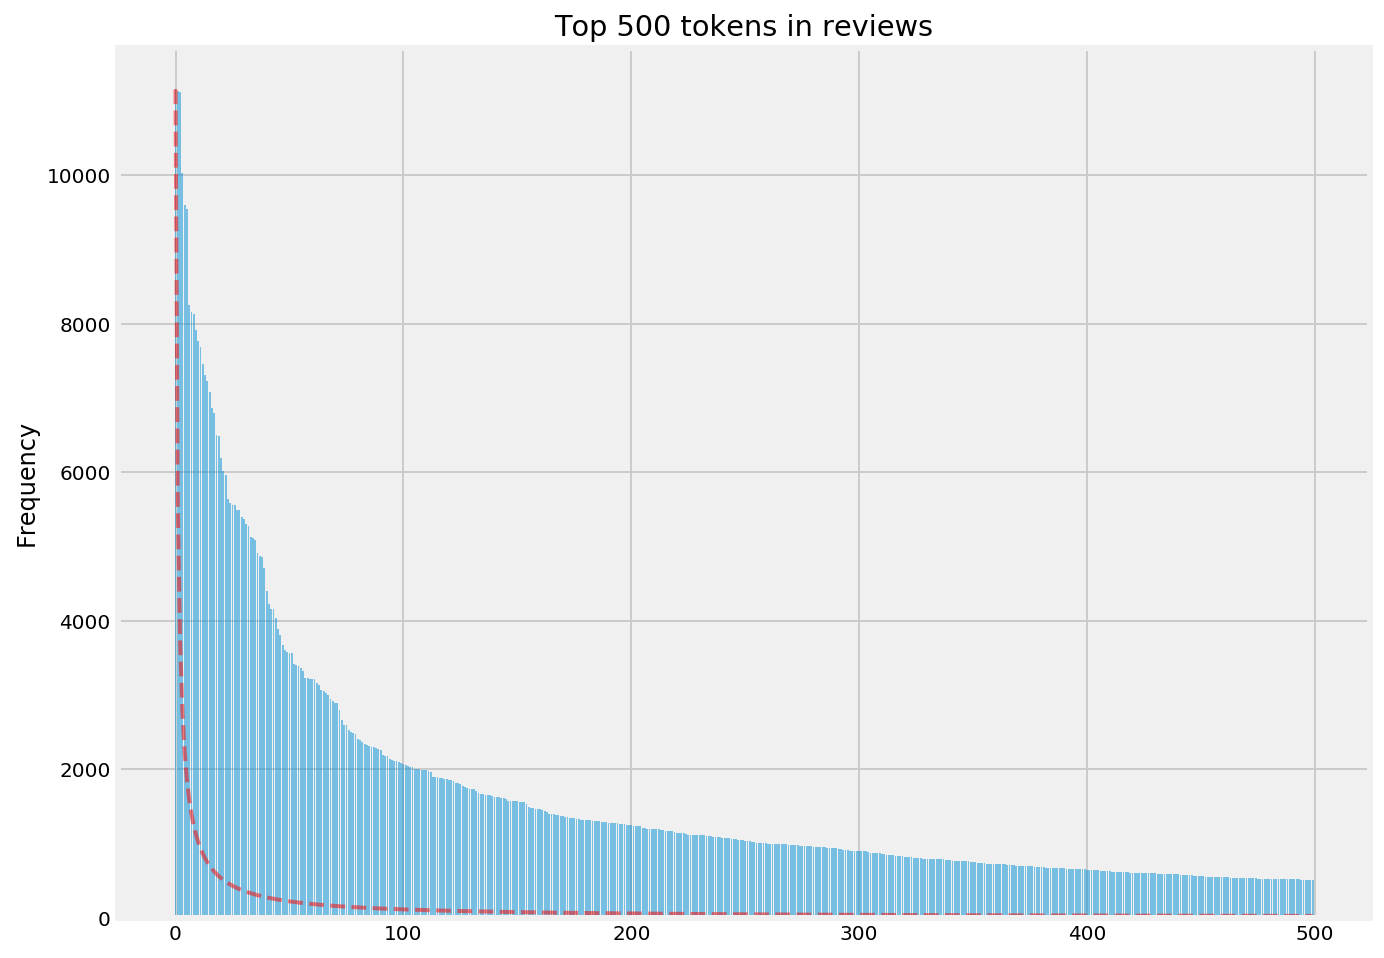

In [50]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df3.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df3.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in reviews')

<Figure size 864x720 with 0 Axes>

<BarContainer object of 50 artists>

([<matplotlib.axis.XTick at 0x1b2705cc5c0>,
 <a list of 50 Text xticklabel objects>)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Top 30 negative tokens')

Text(0.5, 1.0, 'Top 30 tokens in negative reviews')

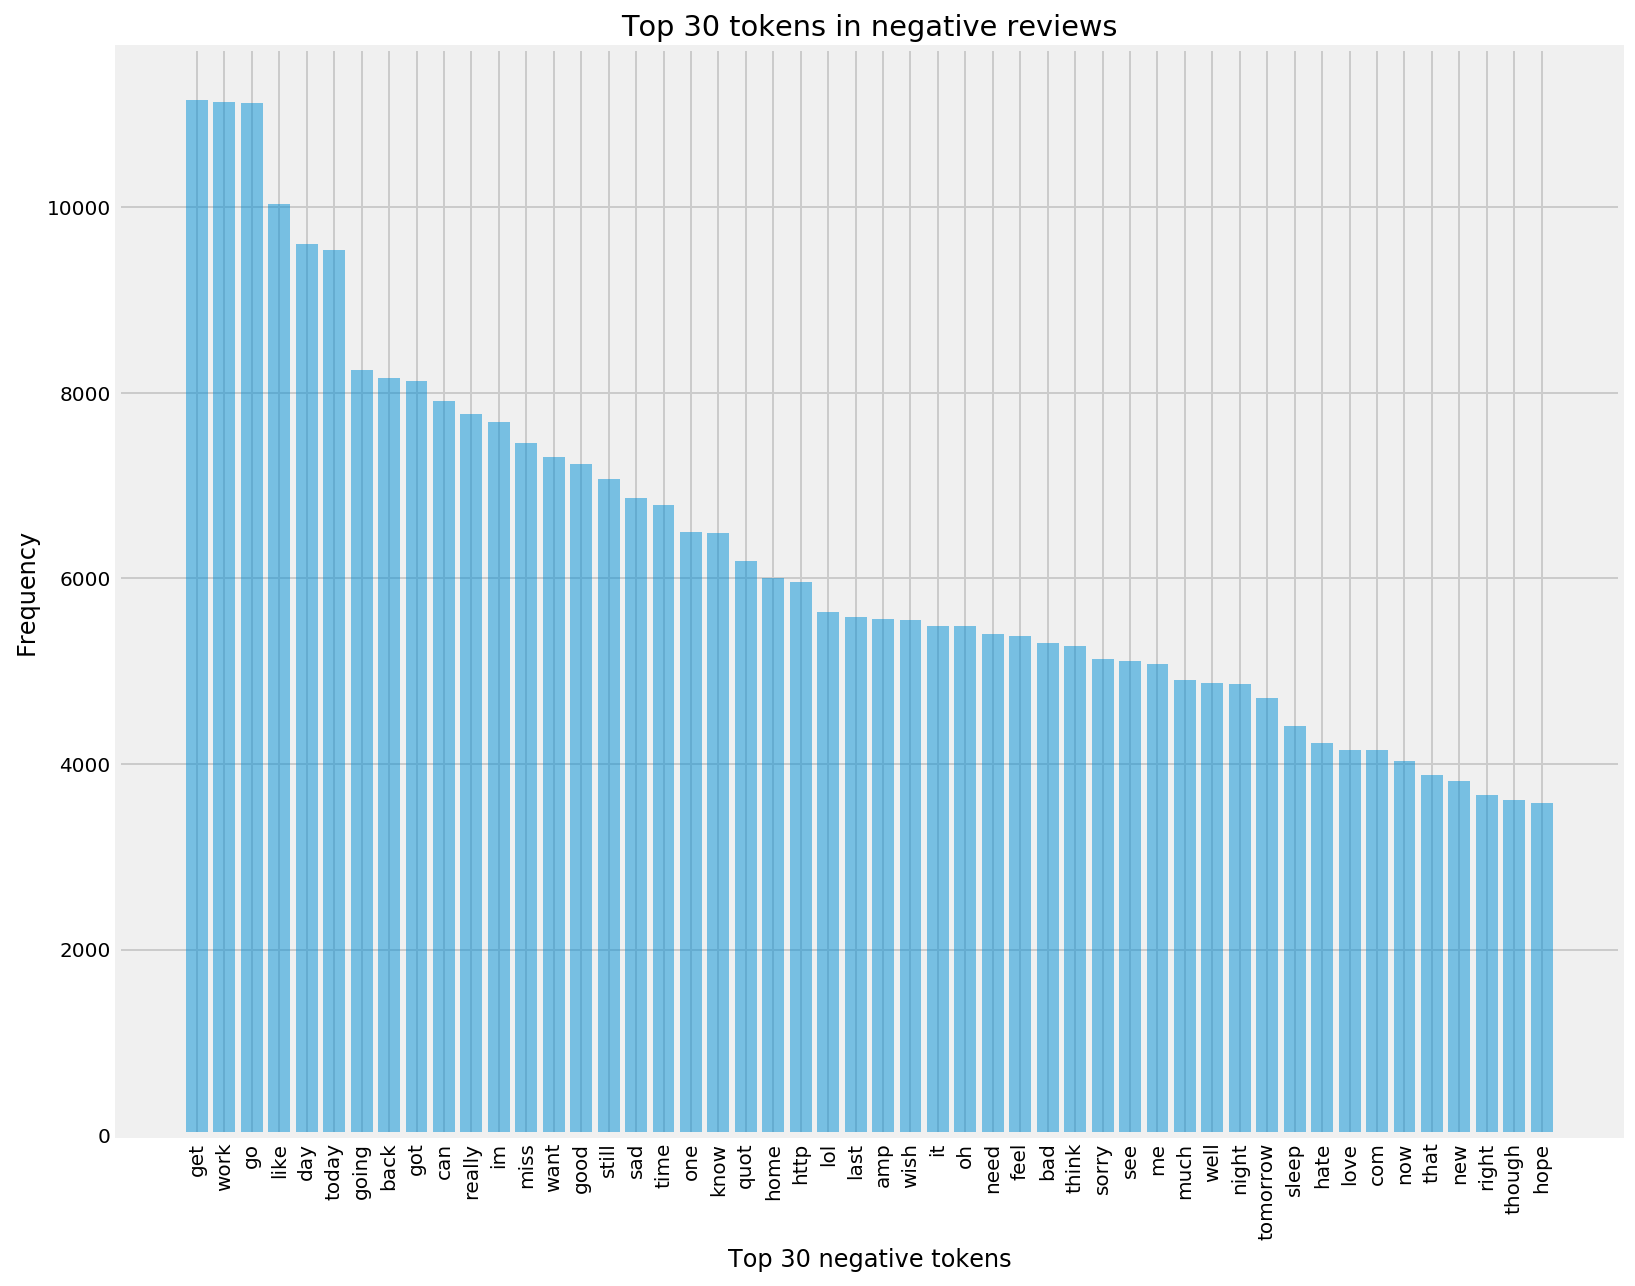

In [51]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df3.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df3.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 30 negative tokens')
plt.title('Top 30 tokens in negative reviews')

<Figure size 864x360 with 0 Axes>

<BarContainer object of 50 artists>

([<matplotlib.axis.XTick at 0x1b20b23f400>,
 <a list of 50 Text xticklabel objects>)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Top 30 positive tokens')

Text(0.5, 1.0, 'Top 30 tokens in positive reviews')

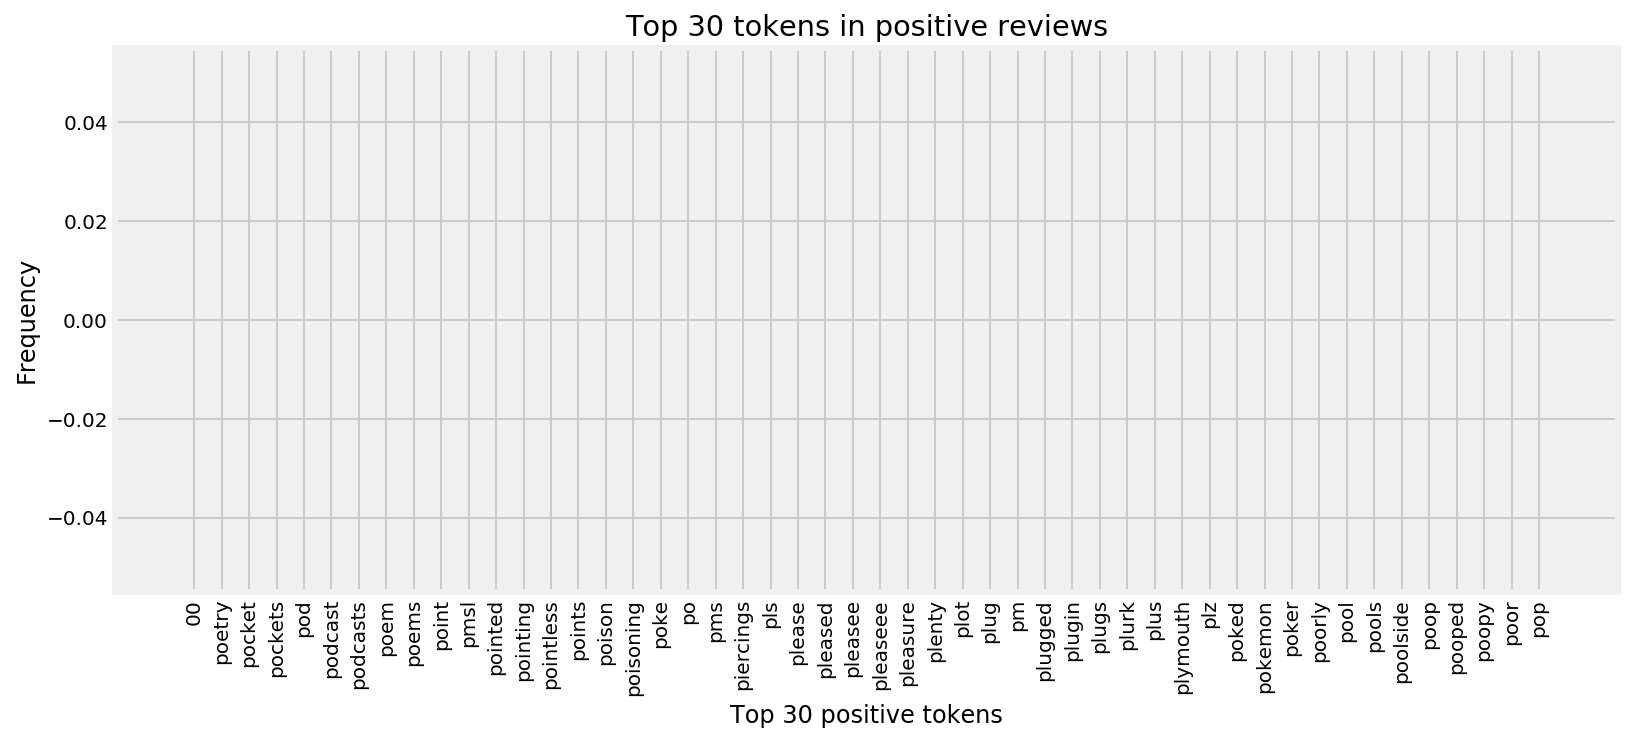

In [72]:
y_pos = np.arange(50)
plt.figure(figsize=(12,5))
plt.bar(y_pos, term_freq_df3.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.01)
plt.xticks(y_pos, term_freq_df3.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 30 positive tokens')# Get top 30 positive reviews
plt.title('Top 30 tokens in positive reviews')

<Figure size 864x720 with 0 Axes>

Text(0, 0.5, 'Positive Frequency')

Text(0.5, 0, 'Negative Frequency')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

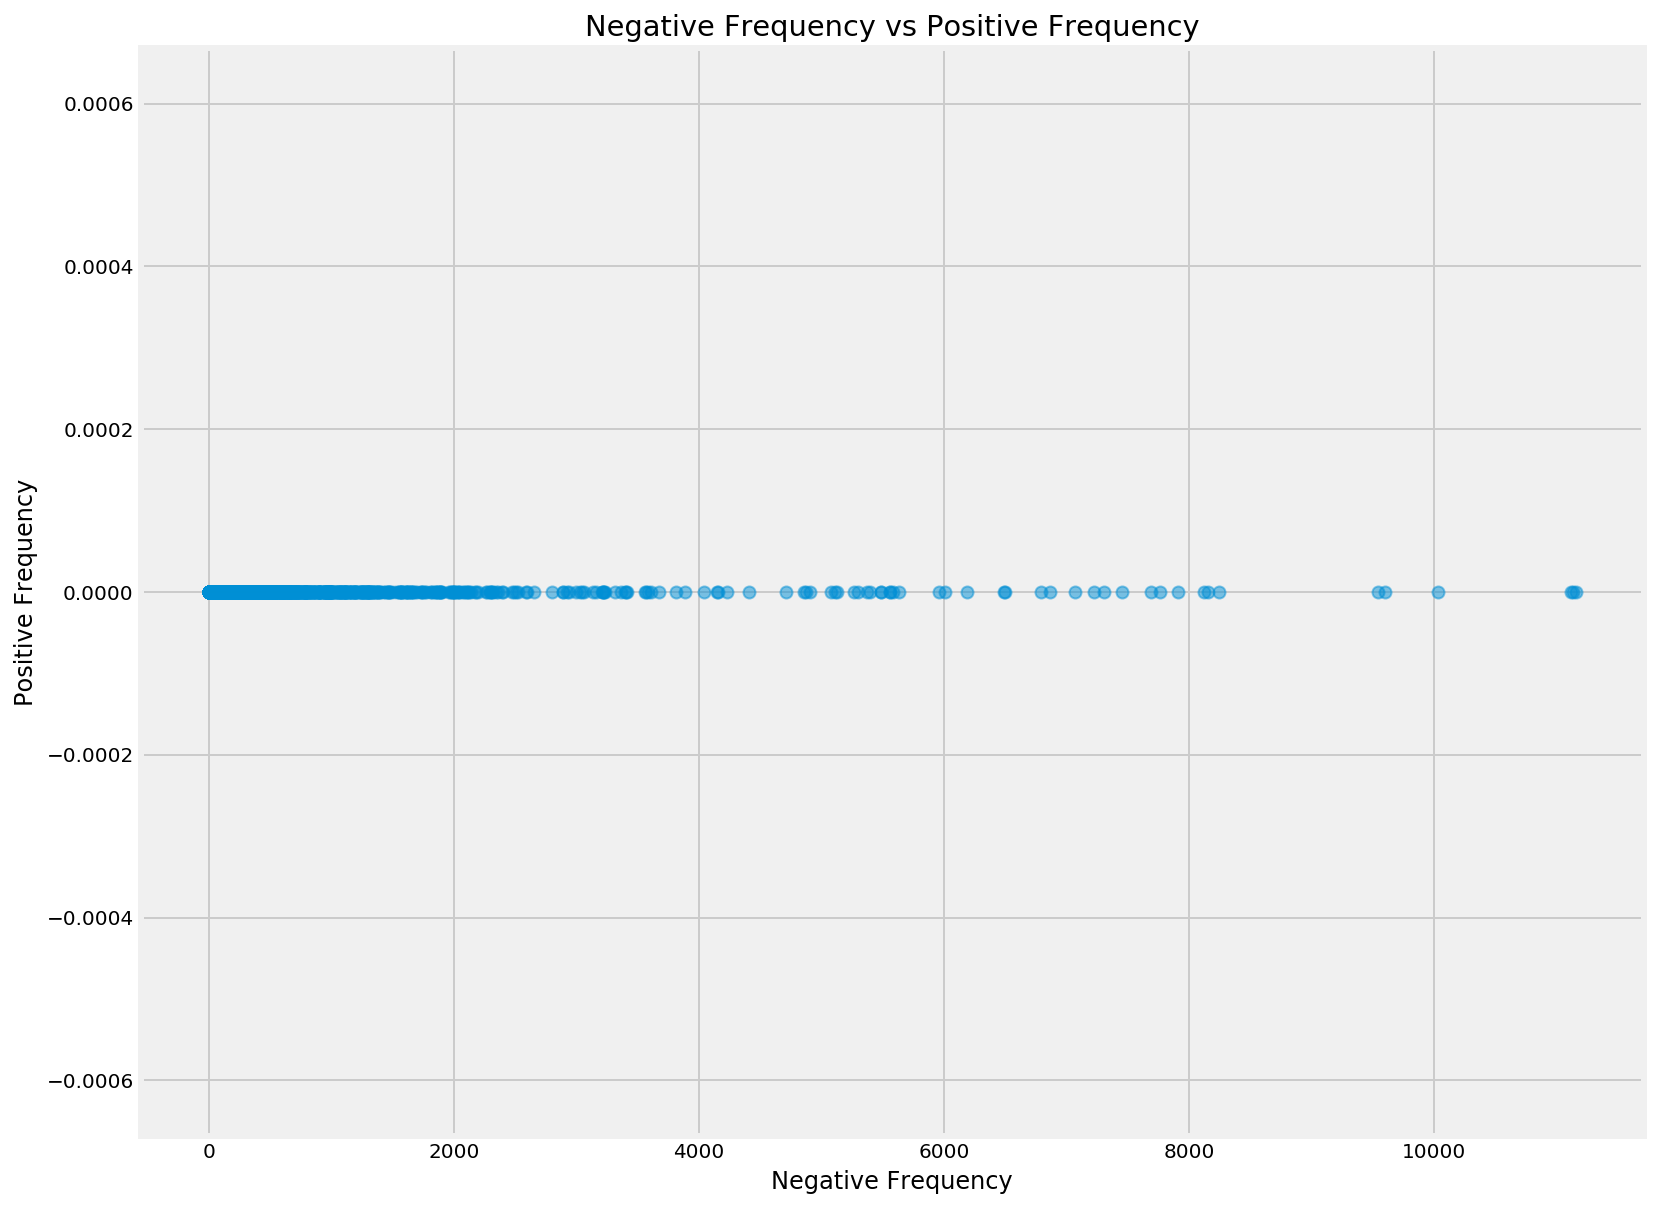

In [73]:
import seaborn as sns
plt.figure(figsize=(12,10))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df3)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [74]:
term_freq_df3['pos_rate'] = term_freq_df3['positive'] * 1./term_freq_df3['total']
term_freq_df3.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
00,177,0,177,0.0
poetry,17,0,17,0.0
pocket,59,0,59,0.0
pockets,18,0,18,0.0
pod,18,0,18,0.0
podcast,44,0,44,0.0
podcasts,11,0,11,0.0
poem,16,0,16,0.0
poems,8,0,8,0.0
point,294,0,294,0.0


In [75]:
term_freq_df3['pos_freq_pct'] = term_freq_df3['positive'] * 1./term_freq_df3['positive'].sum()
term_freq_df3.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
00,177,0,177,0.0,NaN
000,103,0,103,0.0,NaN
00am,26,0,26,0.0,NaN
00pm,17,0,17,0.0,NaN
01,19,0,19,0.0,NaN
02,21,0,21,0.0,NaN
03,20,0,20,0.0,NaN
04,22,0,22,0.0,NaN
05,19,0,19,0.0,NaN
06,37,0,37,0.0,NaN


In [76]:
from scipy.stats import hmean

term_freq_df3['pos_hmean'] = term_freq_df3.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])
                                                                   if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df3.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
00,177,0,177,0.0,NaN,0
poetry,17,0,17,0.0,NaN,0
pocket,59,0,59,0.0,NaN,0
pockets,18,0,18,0.0,NaN,0
pod,18,0,18,0.0,NaN,0
podcast,44,0,44,0.0,NaN,0
podcasts,11,0,11,0.0,NaN,0
poem,16,0,16,0.0,NaN,0
poems,8,0,8,0.0,NaN,0
point,294,0,294,0.0,NaN,0


In [81]:
#plt.figure(figsize=(8,6))
#ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df3)
#plt.ylabel('Positive Rate and Frequency Harmonic Mean')
#plt.xlabel('Negative Rate and Frequency Harmonic Mean')
#plt.title('neg_hmean vs pos_hmean')

In [85]:
#pred = [1 if t > 0.56 else 0 for t in y_val_predicted_proba]

In [86]:
#Load textblob library

from textblob import TextBlob, Word

In [87]:
#Review sample

review_sample = yelp_df.text_Clean.sample(1).iloc[0]
print(review_sample)

good workout! cant wait another one tomorrow


In [88]:
# Adopt textblob to review sample for sentiment analysis to get the polarity and subjectivity

TextBlob(review_sample).sentiment



Sentiment(polarity=0.875, subjectivity=0.6000000000000001)

In [100]:
yelp_df.head()

sample_reviews = yelp_df.sample(1000)

#sample_reviews = yelp_df[['Target', 'text_Clean']].sample(1000)


#sample_reviews = yelp_df.columns.to_series().apply(lambda x: x.strip())
#sample_reviews = sample_reviews.columns[['Target', 'text_Clean']].sample(1000)

,text_Clean,target
0,"@switchfoot http://twitpic.com/2y1zl - awww, that's bummer. shoulda got david carr third day it. ;d",0
1,whole body feels itchy like fire,0
2,@tatiana_k nope,0
3,re-pierced ears,0
4,@caregiving bear watch it. thought ua loss embarrassing . . . . .,0


In [101]:
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity

In [102]:
sample_reviews['Polarity'] = sample_reviews.text_Clean.apply(detect_polarity)
sample_reviews.head()

,text_Clean,target,Polarity
296200,"... long nite @ work, i'm tired n got headache. still hooked waffles w/ fruit n cheese omelette",4,-0.225000
366823,@lint1 lol cool. show mcr=air=life,4,0.575000
366536,@reminiscesmith rant u want-it feels good let out-but keep moving forward &amp; look back every often c far u've come,4,0.266667
278545,wishes everyone fantabulous weekend! http://plurk.com/p/x91aw,4,0.000000
136189,real housewives new jersey great atl sad see last episode weekend!,0,0.127273


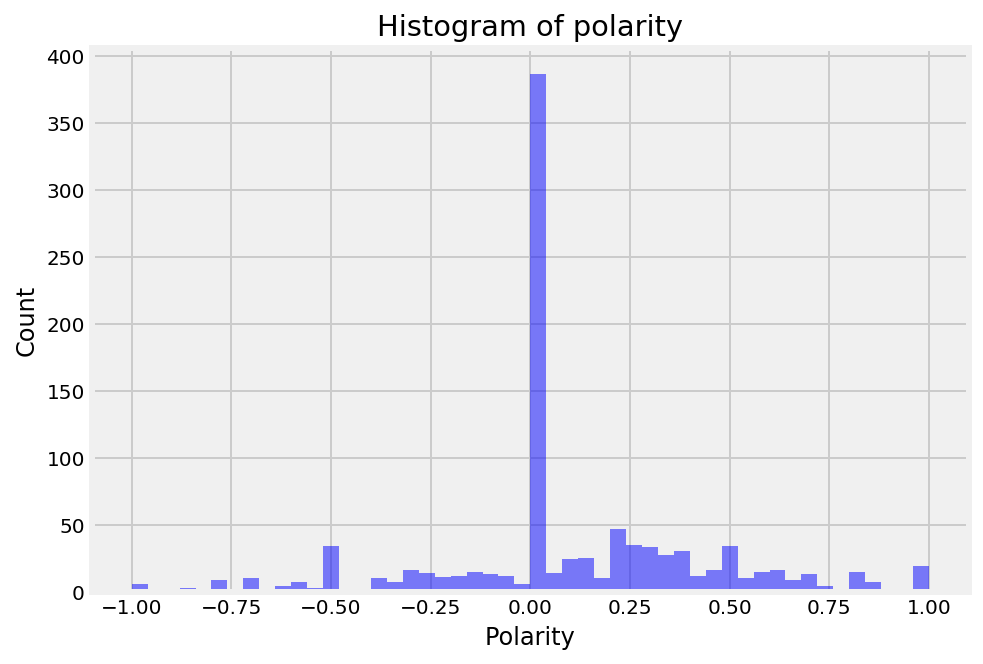

In [104]:
# A histogram of the polarity scores.
num_bins = 50
plt.figure(figsize=(7,5))
n, bins, patches = plt.hist(sample_reviews.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

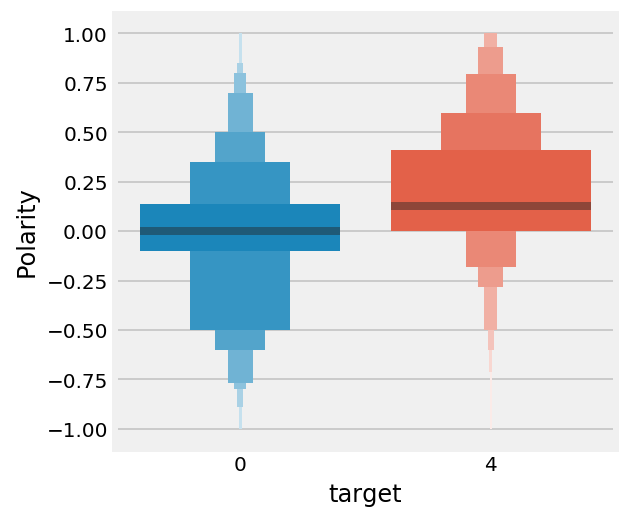

In [106]:
# Box plot of sentiment grouped by stars
import seaborn as sns
plt.figure(figsize=(4,4))
sns.boxenplot(x='target', y='Polarity', data=sample_reviews)
plt.show();

In [108]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%% matplotlib inline

UsageError: Line magic function `%%` not found.


In [109]:
df[["Polarity", "Tweet"]].head()

NameError: name 'df' is not defined

In [110]:
yelp_df.head()

,text_Clean,target
0,"@switchfoot http://twitpic.com/2y1zl - awww, that's bummer. shoulda got david carr third day it. ;d",0
1,whole body feels itchy like fire,0
2,@tatiana_k nope,0
3,re-pierced ears,0
4,@caregiving bear watch it. thought ua loss embarrassing . . . . .,0


(-0.5, 399.5, 199.5, -0.5)

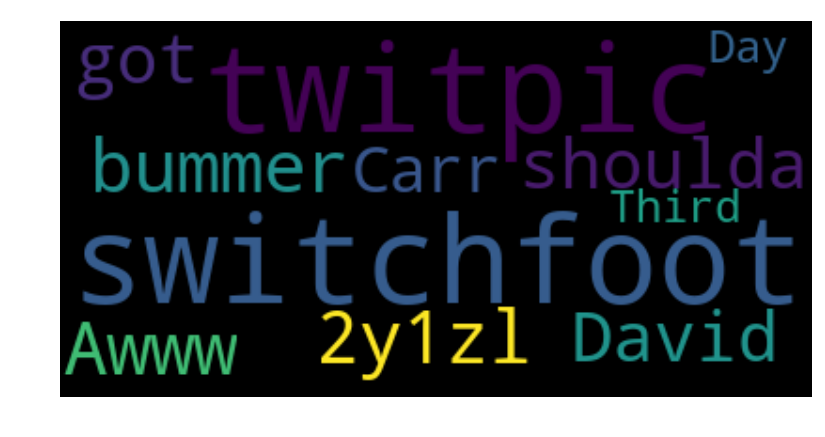

In [111]:
#Start with one review:

text = yelp_labelled.Tweet[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

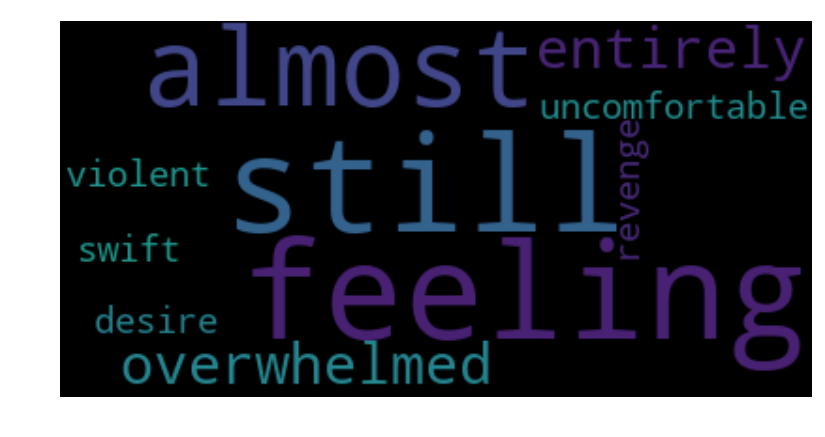

In [114]:
text = yelp_labelled.Tweet[1000]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

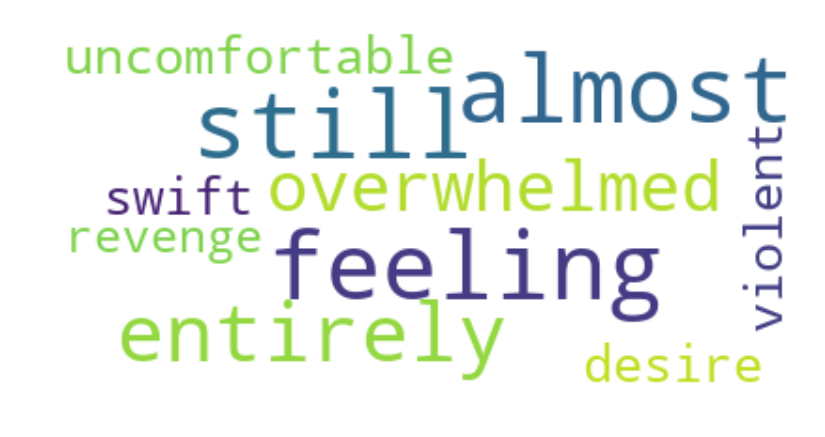

In [117]:
text = yelp_labelled.Tweet[1000]

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)

# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:

sample_reviews.head()
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))


In [127]:
#yelp_df.text_Clean
text = " ".join(review for review in yelp_df.text_Clean)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 22061005 words in the combination of all review.


<Figure size 432x288 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

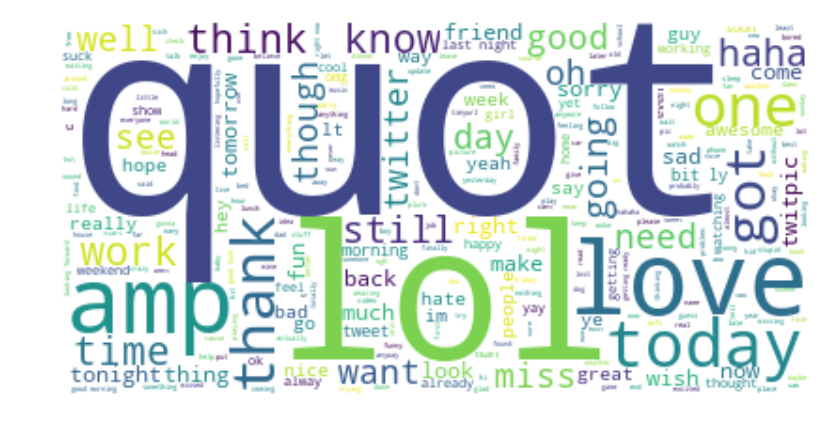

In [130]:
wordcloud = WordCloud(max_font_size=150, max_words=1000, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()